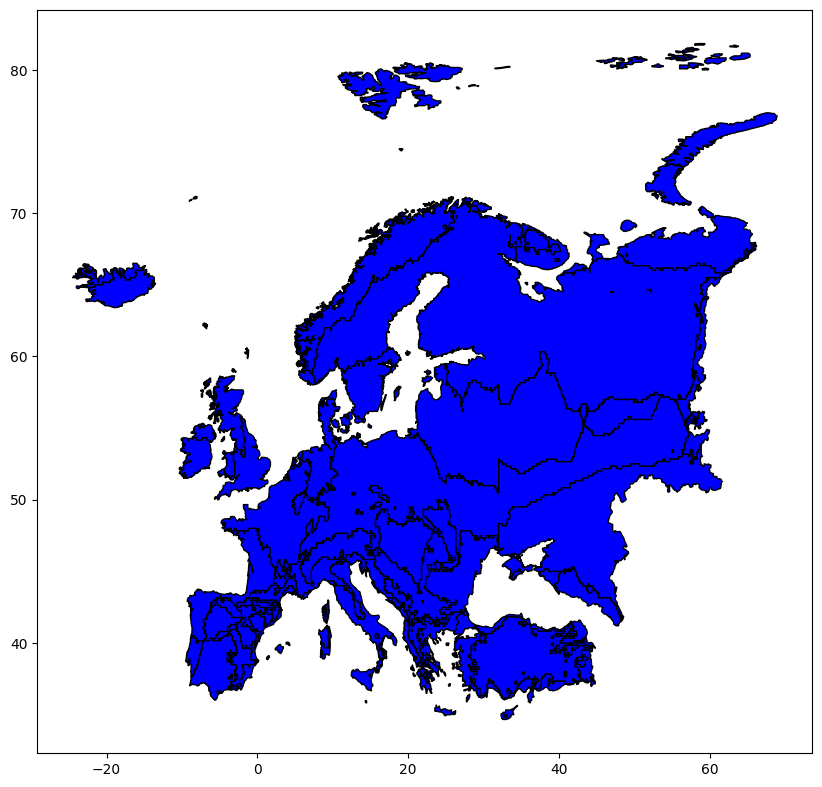

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile
shapefile_path = "/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/IPCC_Europe_regions/IPCC_regions_Aug2013.shp"
gdf = gpd.read_file(shapefile_path)

# Plot the shapefile
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', edgecolor='black')
plt.show()


In [3]:
gdf

,IPCC17,IPCC5,geometry
0,Alpine North,Alpine,"MULTIPOLYGON (((6.33003 59.16339, 6.02163 59.1..."
1,Alpine South,Alpine,"MULTIPOLYGON (((20.49673 40.83002, 20.33006 40..."
2,Anatolian,Southern,"MULTIPOLYGON (((33.16645 34.83302, 32.66645 34..."
3,Arctic,Northern,"MULTIPOLYGON (((36.83312 64.99211, 36.83312 64..."
4,Atlantic Central,Atlantic,"MULTIPOLYGON (((6.33003 46.33003, 6.33003 46.4..."
5,Atlantic North,Atlantic,"MULTIPOLYGON (((7.33004 49.99670, 7.33004 49.8..."
6,Black Sea,Southern,"MULTIPOLYGON (((36.99979 40.49969, 36.83312 40..."
7,Boreal,Northern,"MULTIPOLYGON (((27.33008 56.16338, 27.16341 56..."
8,Continental,Continental,"MULTIPOLYGON (((20.16339 42.49669, 19.99673 42..."
9,Eastern Mountains,Alpine,"MULTIPOLYGON (((34.33312 37.16635, 34.16645 37..."


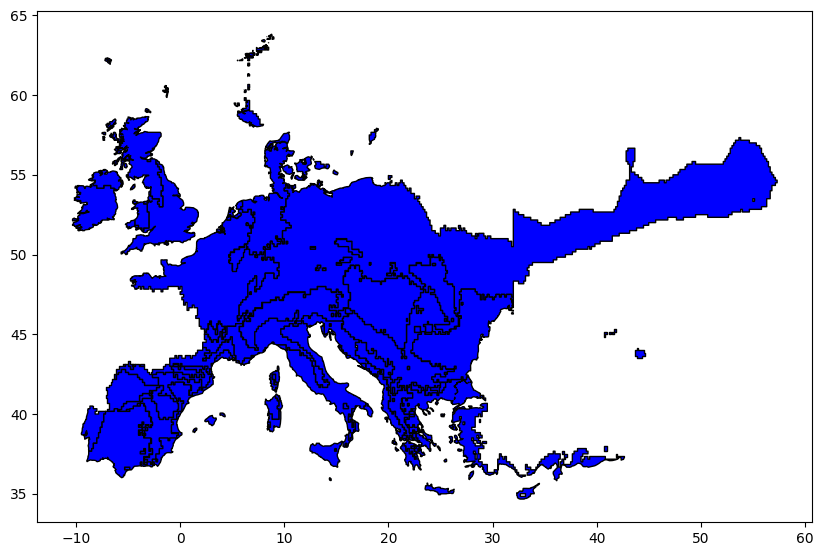

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr

ds = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/base_models/RESULTS/tasmean/LGBMRegressor_tasmean_ztuvq_500_850_mslpt2m_dem_doy.nc")    

# 1. Extract latitude and longitude bounds from your xarray dataset
# Let's assume your xarray dataset is named 'ds'
lat_min, lat_max = coord.y.min().values, coord.y.max().values
lon_min, lon_max = coord.x.min().values, coord.x.max().values

# 2. Create a bounding box
bbox = (lon_min, lat_min, lon_max, lat_max)

# 3. Read the shapefile using geopandas
shapefile_path = "/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/IPCC_Europe_regions/IPCC_regions_Aug2013.shp"
gdf = gpd.read_file(shapefile_path)

# 4. Crop the shapefile using the bounding box
gdf_crop = gdf.cx[bbox[0]:bbox[2], bbox[1]:bbox[3]]  # Cropping based on the bounding box

# 5. Plot the cropped shapefile
fig, ax = plt.subplots(figsize=(10, 10))
gdf_crop.plot(ax=ax, color='blue', edgecolor='black')
plt.show()


<Axes: >

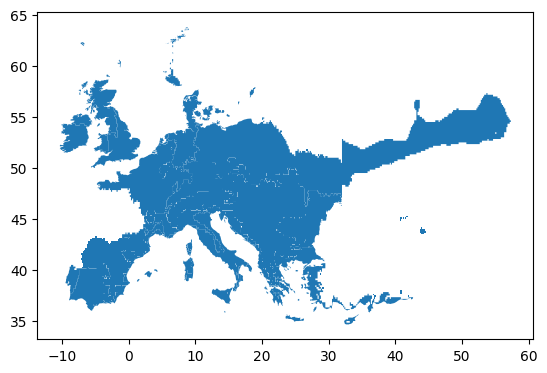

In [9]:
import xarray as xr
import geopandas as gpd
from shapely.geometry import box

#ds = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/base_models/RESULTS/tasmean/LGBMRegressor_tasmean_ztuvq_500_850_mslpt2m_dem_doy.nc")    
gdf = gpd.read_file("/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/IPCC_Europe_regions/IPCC_regions_Aug2013.shp")
xmin, ymin, xmax, ymax = ds.rio.bounds()  # Using rioxarray for bounds
bbox = box(xmin, ymin, xmax, ymax)
filtered_gdf = gdf[gdf.geometry.intersects(bbox)]
filtered_gdf.plot()  # Plot the filtered features
#ds.plot()             # Plot the xarray dataset


In [12]:
print(xmin, ymin, xmax, ymax)

5.050098442566834 43.586491278911645 15.857159859788778 50.030453366199275


In [5]:
# Get coordinates of the filtered features
coords = filtered_gdf.geometry.centroid.to_crs(ds.crs).coords

# Extract data for those coordinates
extracted_data = ds.sel(**coords)


/tmp/ipykernel_109453/2366595107.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  coords = filtered_gdf.geometry.centroid.to_crs(ds.crs).coords


AttributeError: 'GeoSeries' object has no attribute 'coords'

In [2]:
import xarray as xr

# Open your dataset
ds = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/base_models/RESULTS/tasmean/LGBMRegressor_tasmean_ztuvq_500_850_mslpt2m_dem_doy.nc")

# Set the CRS attribute
ds.attrs['crs'] = 'EPSG:4326'  # Replace 'EPSG:4326' with your desired CRS

# Optionally, you can set more attributes like units, coordinates, etc.
# For example:
ds.y.attrs['units'] = 'degrees_north'
ds.x.attrs['units'] = 'degrees_east'



In [3]:
ds

<xarray.Dataset> Size: 226MB
Dimensions:  (time: 1826, y: 96, x: 161)
Coordinates:
  * time     (time) datetime64[ns] 15kB 2016-01-01 2016-01-02 ... 2020-12-30
  * y        (y) float64 768B 43.62 43.69 43.75 43.82 ... 49.8 49.86 49.93 50.0
  * x        (x) float64 1kB 5.084 5.151 5.218 5.285 ... 15.62 15.69 15.76 15.82
Data variables:
    tasmean  (time, y, x) float64 226MB ...
Attributes:
    crs:      EPSG:4326

In [6]:
gdf

,IPCC17,IPCC5,geometry
0,Alpine North,Alpine,"MULTIPOLYGON (((6.33003 59.16339, 6.02163 59.1..."
1,Alpine South,Alpine,"MULTIPOLYGON (((20.49673 40.83002, 20.33006 40..."
2,Anatolian,Southern,"MULTIPOLYGON (((33.16645 34.83302, 32.66645 34..."
3,Arctic,Northern,"MULTIPOLYGON (((36.83312 64.99211, 36.83312 64..."
4,Atlantic Central,Atlantic,"MULTIPOLYGON (((6.33003 46.33003, 6.33003 46.4..."
5,Atlantic North,Atlantic,"MULTIPOLYGON (((7.33004 49.99670, 7.33004 49.8..."
6,Black Sea,Southern,"MULTIPOLYGON (((36.99979 40.49969, 36.83312 40..."
7,Boreal,Northern,"MULTIPOLYGON (((27.33008 56.16338, 27.16341 56..."
8,Continental,Continental,"MULTIPOLYGON (((20.16339 42.49669, 19.99673 42..."
9,Eastern Mountains,Alpine,"MULTIPOLYGON (((34.33312 37.16635, 34.16645 37..."


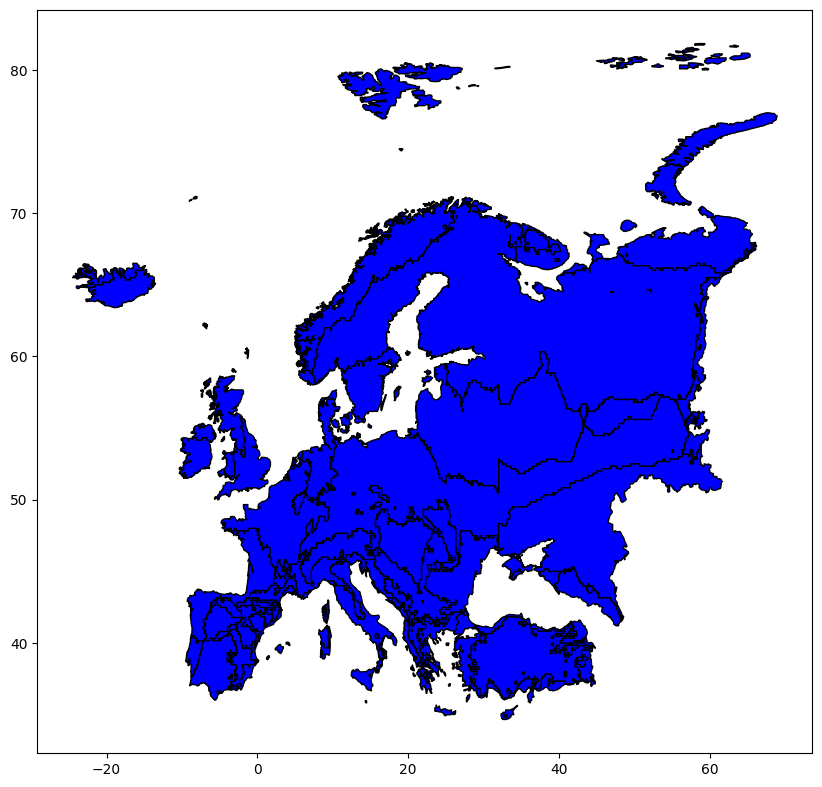

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile
shapefile_path = "/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/IPCC_Europe_regions/IPCC_regions_Aug2013.shp"
gdf = gpd.read_file(shapefile_path)

# Plot the shapefile
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', edgecolor='black')
plt.show()


In [10]:
cropped_gdf = gdf.clip(ds.rio.bounds())


<Axes: >

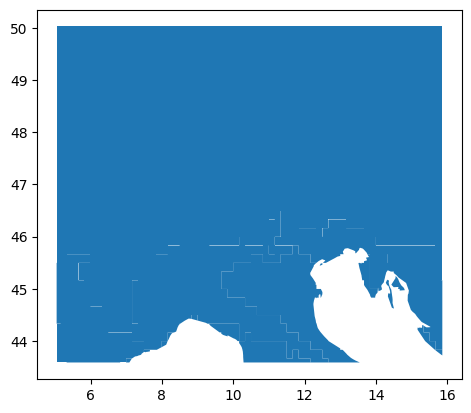

In [12]:
cropped_gdf.plot()

In [13]:
cropped_gdf

,IPCC17,IPCC5,geometry
14,Med. South,Southern,"MULTIPOLYGON (((6.99670 43.66335, 7.15960 43.6..."
13,Med. North,Southern,"MULTIPOLYGON (((6.83003 43.58649, 6.83003 43.6..."
12,Med. Mountains,Southern,"MULTIPOLYGON (((14.33005 45.16978, 14.33005 45..."
1,Alpine South,Alpine,"MULTIPOLYGON (((14.41539 45.49669, 14.33005 45..."
4,Atlantic Central,Atlantic,"MULTIPOLYGON (((6.33003 46.33003, 6.33003 46.4..."
5,Atlantic North,Atlantic,"MULTIPOLYGON (((7.33004 49.99670, 7.33004 49.8..."
16,Pannonian,Continental,"POLYGON ((15.66339 48.16336, 15.66339 48.66336..."
8,Continental,Continental,"MULTIPOLYGON (((14.66338 46.16336, 14.49672 46..."


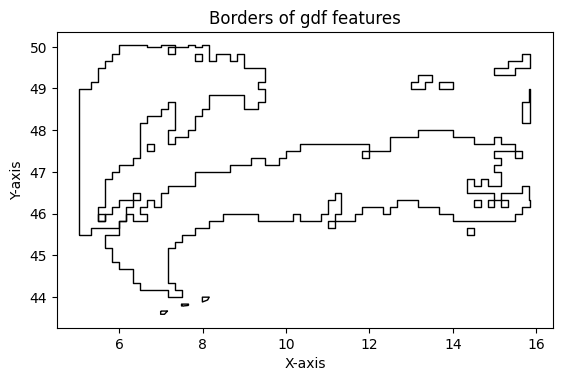

In [18]:
# Set facecolor to 'none' to hide the interior fill
result.plot(facecolor='none', edgecolor='black', linewidth=1)

# Optional: Customize plot appearance
plt.title('Borders of gdf features')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [16]:
# Step 1: Identify unique values in the column
unique_values = cropped_gdf['IPCC5'].unique()

# Step 2: Select one row for each unique value
selected_rows = []
for val in unique_values:
    selected_rows.append(cropped_gdf[cropped_gdf['IPCC5'] == val].iloc[0])  # Selecting the first occurrence

# Step 3: Concatenate selected rows into a new GeoDataFrame
result = gpd.GeoDataFrame(selected_rows)

print(result)

              IPCC17        IPCC5  \
14        Med. South     Southern   
1       Alpine South       Alpine   
4   Atlantic Central     Atlantic   
16         Pannonian  Continental   

                                             geometry  
14  MULTIPOLYGON (((6.99670 43.66335, 7.15960 43.6...  
1   MULTIPOLYGON (((14.41539 45.49669, 14.33005 45...  
4   MULTIPOLYGON (((6.33003 46.33003, 6.33003 46.4...  
16  POLYGON ((15.66339 48.16336, 15.66339 48.66336...  


In [17]:
result

,IPCC17,IPCC5,geometry
14,Med. South,Southern,"MULTIPOLYGON (((6.99670 43.66335, 7.15960 43.6..."
1,Alpine South,Alpine,"MULTIPOLYGON (((14.41539 45.49669, 14.33005 45..."
4,Atlantic Central,Atlantic,"MULTIPOLYGON (((6.33003 46.33003, 6.33003 46.4..."
16,Pannonian,Continental,"POLYGON ((15.66339 48.16336, 15.66339 48.66336..."


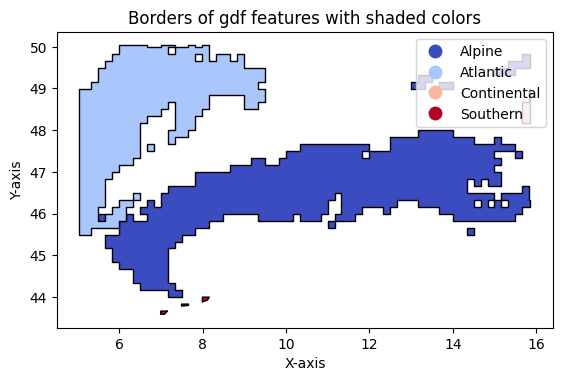

In [20]:
# Set up your plot
result.plot(column='IPCC5', cmap='coolwarm', edgecolor='black', linewidth=1, legend=True)

# Customize plot appearance
plt.title('Borders of gdf features with shaded colors')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


In [21]:
gdf

,IPCC17,IPCC5,geometry
0,Alpine North,Alpine,"MULTIPOLYGON (((6.33003 59.16339, 6.02163 59.1..."
1,Alpine South,Alpine,"MULTIPOLYGON (((20.49673 40.83002, 20.33006 40..."
2,Anatolian,Southern,"MULTIPOLYGON (((33.16645 34.83302, 32.66645 34..."
3,Arctic,Northern,"MULTIPOLYGON (((36.83312 64.99211, 36.83312 64..."
4,Atlantic Central,Atlantic,"MULTIPOLYGON (((6.33003 46.33003, 6.33003 46.4..."
5,Atlantic North,Atlantic,"MULTIPOLYGON (((7.33004 49.99670, 7.33004 49.8..."
6,Black Sea,Southern,"MULTIPOLYGON (((36.99979 40.49969, 36.83312 40..."
7,Boreal,Northern,"MULTIPOLYGON (((27.33008 56.16338, 27.16341 56..."
8,Continental,Continental,"MULTIPOLYGON (((20.16339 42.49669, 19.99673 42..."
9,Eastern Mountains,Alpine,"MULTIPOLYGON (((34.33312 37.16635, 34.16645 37..."


Main 

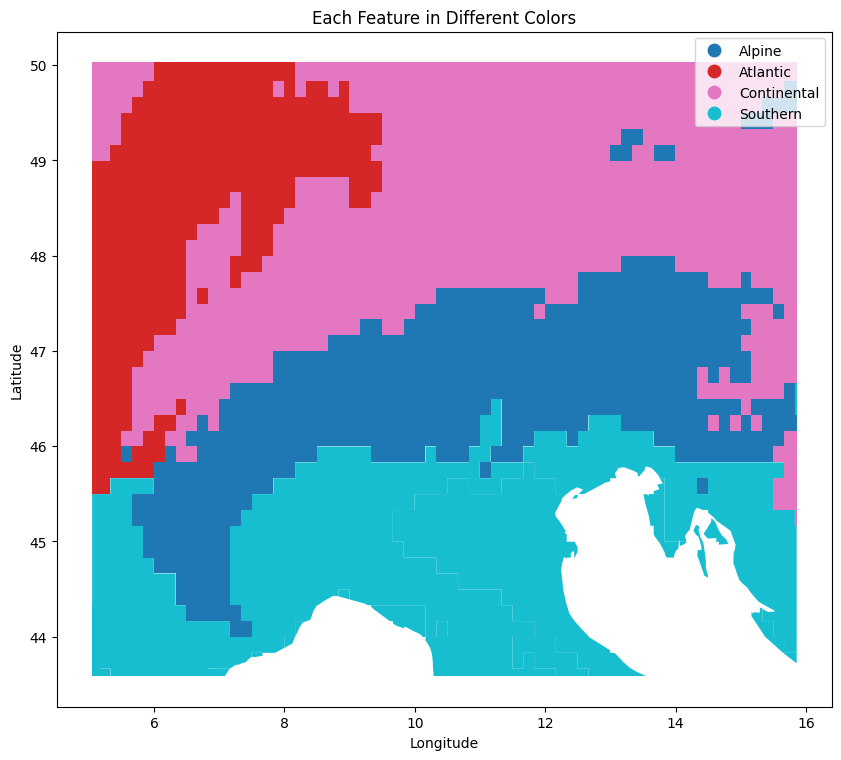

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile
shapefile_path = "/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/IPCC_Europe_regions/IPCC_regions_Aug2013.shp"
gdf = gpd.read_file(shapefile_path)
ds = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/base_models/RESULTS/tasmean/LGBMRegressor_tasmean_ztuvq_500_850_mslpt2m_dem_doy.nc")    
xmin, ymin, xmax, ymax = ds.rio.bounds()  # Using rioxarray for bounds
cropped_gdf = gdf.clip(ds.rio.bounds())

# Plot the GeoDataFrame with each feature in different colors
cropped_gdf.plot(column="IPCC5", categorical=True, legend=True, figsize=(10, 10))
#cropped_gdf.plot(column="IPCC5", categorical=True, facecolor='none', edgecolor='black', linewidth=1)

# Customize plot appearance
plt.title('Each Feature in Different Colors')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


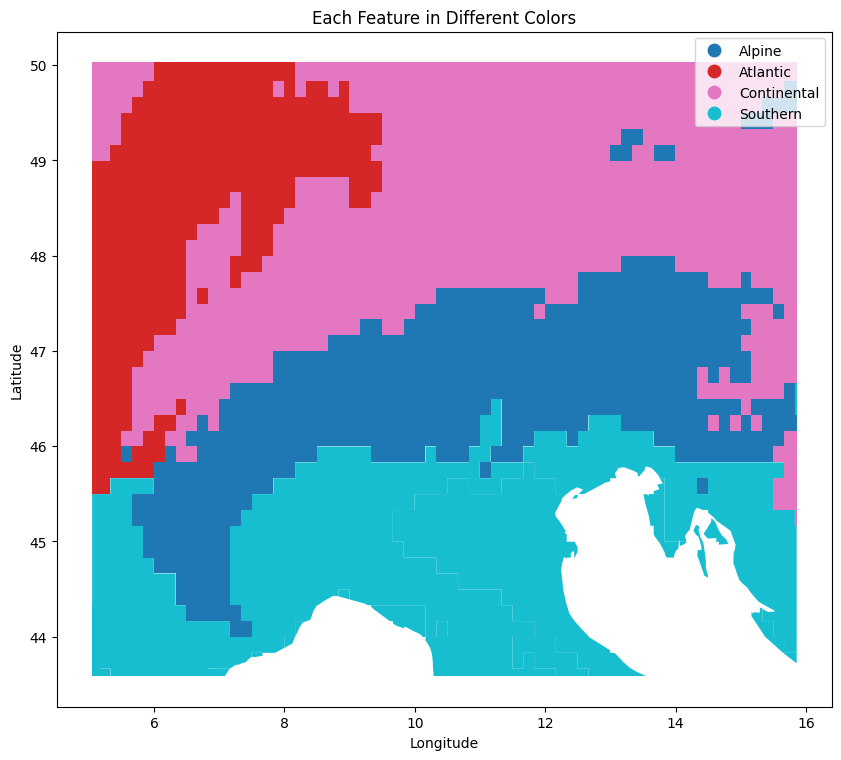

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Define your GeoDataFrame 'gdf'

# Plot the GeoDataFrame with each feature in different colors
cropped_gdf.plot(column="IPCC5", categorical=True, legend=True, figsize=(10, 10))
#cropped_gdf.plot(column="IPCC5", categorical=True, facecolor='none', edgecolor='black', linewidth=1)



# Remove space between plot and frame
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())

# Customize plot appearance
plt.title('Each Feature in Different Colors')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [1]:
import xarray as xr

ds = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/hydroModelDownscale/DEM/interTwin_dem.nc")

In [2]:
ds

<xarray.Dataset> Size: 64kB
Dimensions:  (lon: 161, lat: 96)
Coordinates:
  * lon      (lon) float64 1kB 5.084 5.151 5.218 5.285 ... 15.69 15.76 15.82
  * lat      (lat) float64 768B 43.62 43.69 43.75 43.82 ... 49.86 49.93 50.0
Data variables:
    Band1    (lat, lon) float32 62kB ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Dec 13 12:38:41 2023: cdo remapbil,/mnt/CEPH_PROJECTS/I...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

[ 0.  1.  4.  5.  8. 12. 13. 14. 16.]


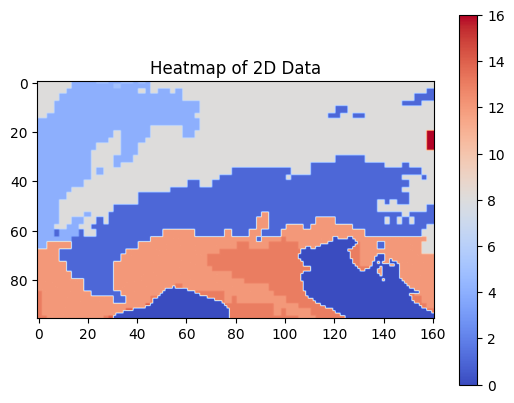

In [40]:
import geopandas as gpd
import rasterio
from rasterio import features
import numpy as np

# Load your GeoDataFrame (gpd) and raster layer
with rasterio.open('/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/hydroModelDownscale/DEM/interTwin_dem.nc') as src:
    raster_data = src.read(1) # assuming single band raster

src

# Define rasterize parameters
transform = src.transform
out_shape = raster_data.shape

# Rasterize the GeoDataFrame
rasterized = features.rasterize(
    [(geom, fid) for fid, geom in zip(cropped_gdf.index, cropped_gdf.geometry)],
    out_shape=out_shape,
    fill=0,
    transform=transform
)

# Loop through raster cells and map to multipolygon feature ID
result_raster = np.zeros_like(raster_data)
for idx, val in np.ndenumerate(raster_data):
    # Extract lat-lon pair value
    lat_lon_val = raster_data[idx]
    # Map to multipolygon feature ID
    if lat_lon_val != src.nodata:
        result_raster[idx] = rasterized[idx]

print(np.unique(result_raster))

# Plot the heatmap
plt.imshow(result_raster, cmap = "coolwarm")
plt.colorbar()  # Add a colorbar
plt.title('Heatmap of 2D Data')
plt.show()

# Create a new raster layer
#with rasterio.open('output_raster.tif', 'w', **src.profile) as dst:
    #dst.write(result_raster, 1)


In [26]:
import xarray as xr

# Assuming you have 'result_raster' numpy array and 'src' rasterio dataset

# Extract metadata from the rasterio dataset
meta = src.meta

# Create a DataArray from the numpy array
da = xr.DataArray(result_raster, dims=('y', 'x'), coords={'y': range(meta['height']), 'x': range(meta['width'])})

# Update other metadata attributes
da.attrs['transform'] = src.transform

# Update the dimensions' coordinates to represent the spatial coordinates
da = da.assign_coords({
    'x': np.linspace(src.bounds.left, src.bounds.right, meta['width']),
    'y': np.linspace(src.bounds.top, src.bounds.bottom, meta['height'])
})

# Print the resulting xarray DataArray
print(da)


<xarray.DataArray (y: 96, x: 161)> Size: 62kB
array([[ 8.,  8.,  8., ...,  8.,  8.,  8.],
       [ 8.,  8.,  8., ...,  8.,  8.,  8.],
       [ 8.,  8.,  8., ...,  8.,  8.,  8.],
       ...,
       [13., 13., 12., ...,  0.,  0., 13.],
       [13., 13., 12., ...,  0.,  0.,  0.],
       [13., 13., 13., ...,  0.,  0.,  0.]], dtype=float32)
Coordinates:
  * x        (x) float64 1kB 5.05 5.118 5.185 5.253 ... 15.65 15.72 15.79 15.86
  * y        (y) float64 768B 50.03 49.96 49.89 49.83 ... 43.72 43.65 43.59
Attributes:
    transform:  | 0.07, 0.00, 5.05|\n| 0.00,-0.07, 50.03|\n| 0.00, 0.00, 1.00|


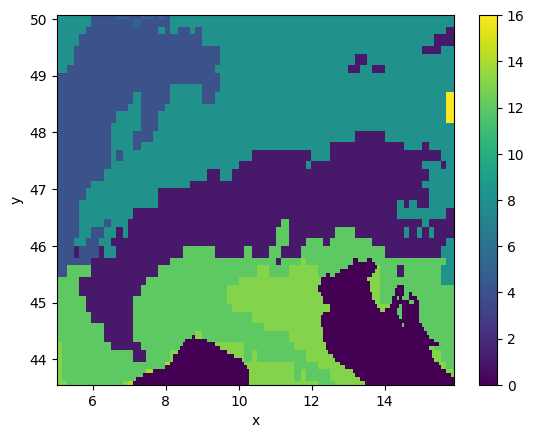

In [29]:
da.plot()

<closed DatasetReader name='/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/hydroModelDownscale/DEM/interTwin_dem.nc' mode='r'>

In [18]:
print(np.unique(result_raster))


array([ 0.,  1.,  4., 14., 16.], dtype=float32)

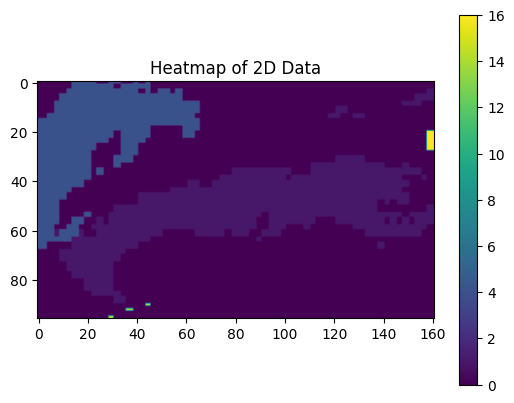

In [31]:
dem = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/hydroModelDownscale/DEM/interTwin_dem.nc")

In [32]:
dem

<xarray.Dataset> Size: 64kB
Dimensions:  (lon: 161, lat: 96)
Coordinates:
  * lon      (lon) float64 1kB 5.084 5.151 5.218 5.285 ... 15.69 15.76 15.82
  * lat      (lat) float64 768B 43.62 43.69 43.75 43.82 ... 49.86 49.93 50.0
Data variables:
    Band1    (lat, lon) float32 62kB ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Dec 13 12:38:41 2023: cdo remapbil,/mnt/CEPH_PROJECTS/I...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [33]:
da

<xarray.DataArray (y: 96, x: 161)> Size: 62kB
array([[ 8.,  8.,  8., ...,  8.,  8.,  8.],
       [ 8.,  8.,  8., ...,  8.,  8.,  8.],
       [ 8.,  8.,  8., ...,  8.,  8.,  8.],
       ...,
       [13., 13., 12., ...,  0.,  0., 13.],
       [13., 13., 12., ...,  0.,  0.,  0.],
       [13., 13., 13., ...,  0.,  0.,  0.]], dtype=float32)
Coordinates:
  * x        (x) float64 1kB 5.05 5.118 5.185 5.253 ... 15.65 15.72 15.79 15.86
  * y        (y) float64 768B 50.03 49.96 49.89 49.83 ... 43.72 43.65 43.59
Attributes:
    transform:  | 0.07, 0.00, 5.05|\n| 0.00,-0.07, 50.03|\n| 0.00, 0.00, 1.00|

In [34]:
ds = da.to_dataset(name='region')


In [35]:
ds

<xarray.Dataset> Size: 64kB
Dimensions:  (x: 161, y: 96)
Coordinates:
  * x        (x) float64 1kB 5.05 5.118 5.185 5.253 ... 15.65 15.72 15.79 15.86
  * y        (y) float64 768B 50.03 49.96 49.89 49.83 ... 43.72 43.65 43.59
Data variables:
    region   (y, x) float32 62kB 8.0 8.0 8.0 8.0 8.0 8.0 ... 0.0 0.0 0.0 0.0 0.0

In [36]:
ds['y'] = ds['y'][::-1]
ds

<xarray.Dataset> Size: 64kB
Dimensions:  (x: 161, y: 96)
Coordinates:
  * x        (x) float64 1kB 5.05 5.118 5.185 5.253 ... 15.65 15.72 15.79 15.86
  * y        (y) float64 768B 43.59 43.65 43.72 43.79 ... 49.89 49.96 50.03
Data variables:
    region   (y, x) float32 62kB 8.0 8.0 8.0 8.0 8.0 8.0 ... 0.0 0.0 0.0 0.0 0.0

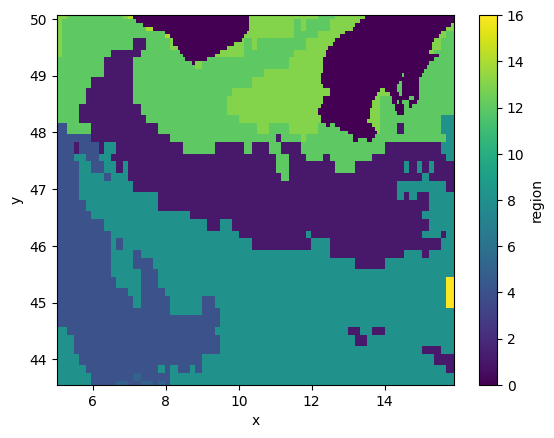

In [37]:
ds.region.plot()